In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_manager as dm

sns.set(style="whitegrid", font_scale=1.4)

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = dm.load_dataframe("sigma_extraction_contest.csv")

In [6]:
df.head()

,noise,method_name,phantom_porosity,phantom_sigma,calculated_sigma,deviation_percent,processing_time_seconds
0,False,anvar,0.1,5,4.523576,9.528489,48.658745
1,False,grimax_h,0.1,5,5.656854,13.137085,0.413111
2,False,grimax_smoothed,0.1,5,5.656854,13.137085,0.410775
3,False,grimax_gaus,0.1,5,4.242641,15.147186,0.412048
4,False,anvar,0.1,10,8.293222,17.067781,48.676943


In [61]:
# df.loc[df.method_name=="anvar", "calculated_sigma"] = df[df.method_name=="anvar"].calculated_sigma / 1.6
# df.head()

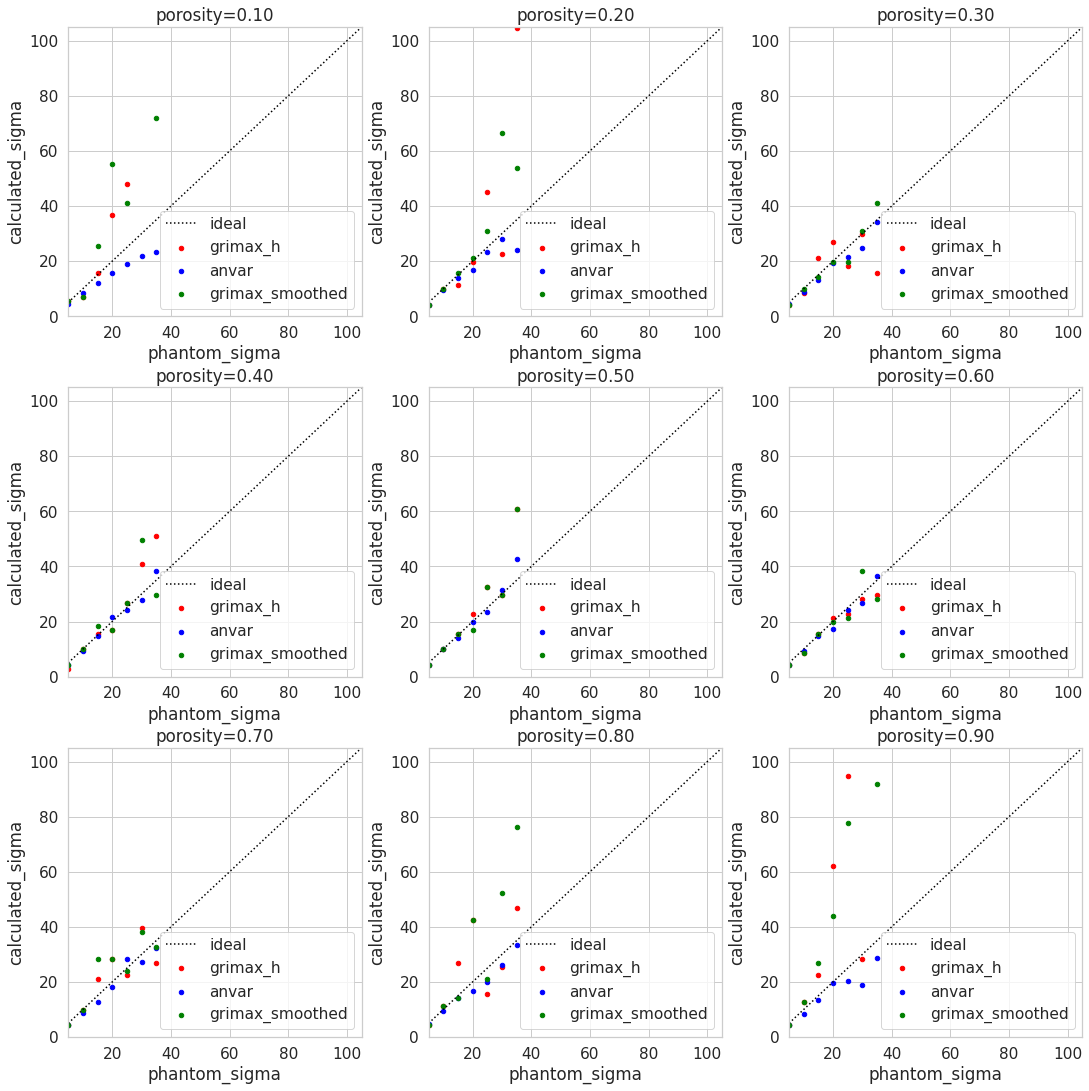

In [62]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax_h", "anvar", "grimax_smoothed"], ["red", "blue", "green"]):
        #polyfit
        equation = ""
        # if method == "anvar":
        #     x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
        #     y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
        #     fit = np.polyfit(x, y, 1)
        #     x_new = np.linspace(10, 35)
        #     ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
        #     equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label=method+equation,
                                                           color=c)
        ax.set_title(f"porosity={p:.2f}")
        ax.set_ylim(0, 105)
        ax.set_xlim(5, 105)
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


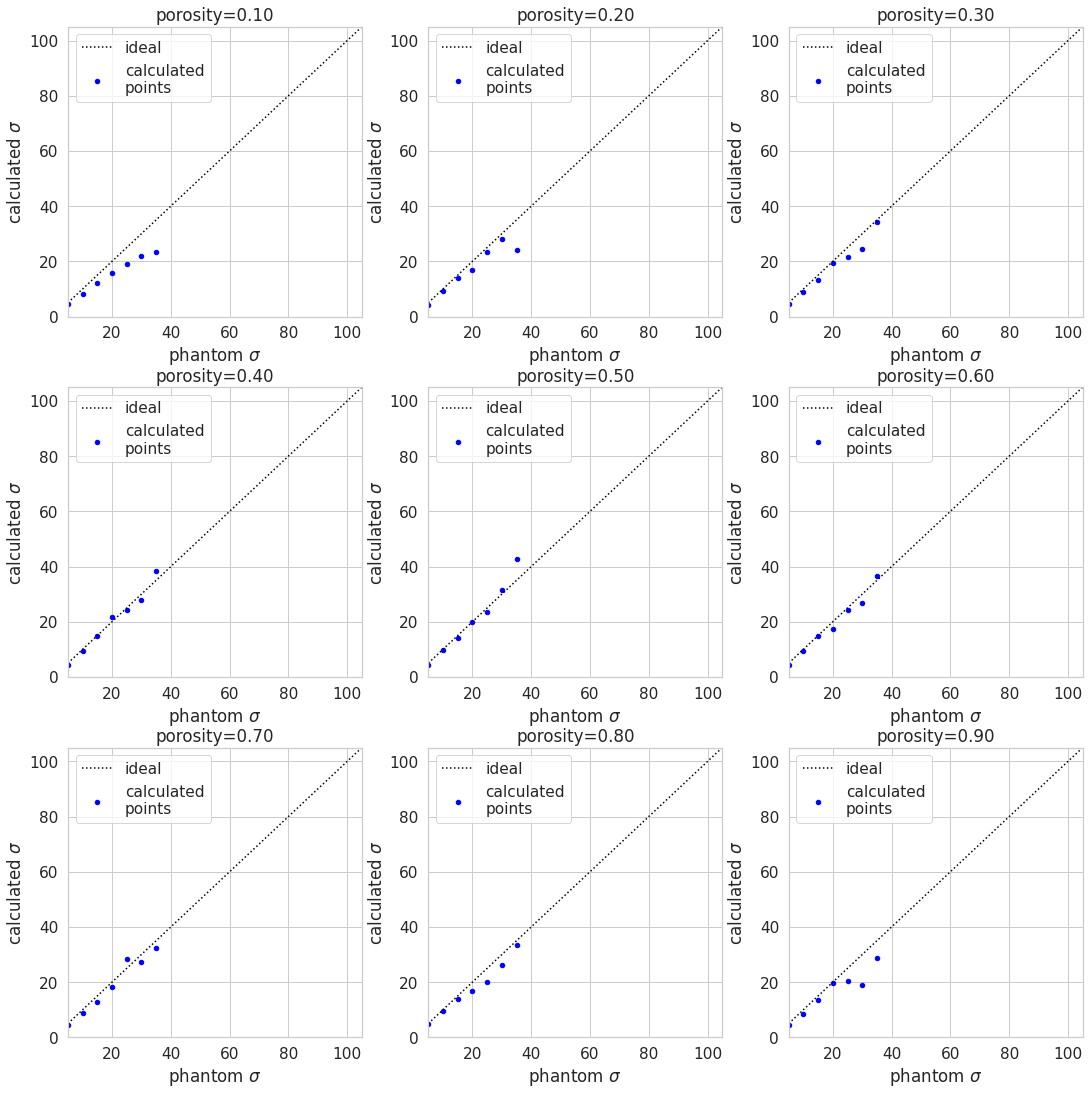

In [63]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["anvar"], ["blue"]):
        #polyfit
        equation = ""
        # if method == "anvar":
        #     x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
        #     y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
        #     fit = np.polyfit(x, y, 1)
        #     x_new = np.linspace(10, 35)
        #     ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
        #     equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label="calculated\npoints",
                                                           color=c)
        ax.set_title(f"porosity={p:.2f}")
        ax.set_ylim(0, 105)
        ax.set_xlim(5, 105)
        ax.set_ylabel("calculated $\sigma$")
        ax.set_xlabel("phantom $\sigma$")
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


# Precision

In [55]:
df.groupby("method_name").get_group("grimax_smoothed").deviation_percent.mean()

36.27457787486989

In [56]:
df.groupby("method_name").get_group("anvar").deviation_percent.mean()

11.437805286482945

In [57]:
df.groupby("method_name").get_group("anvar").processing_time_seconds.mean()

48.78055971944705

In [58]:
df.groupby("method_name").get_group("grimax_smoothed").processing_time_seconds.mean()


0.3485639379359782

In [9]:
method = "grimax"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)


101.9306913354865

In [10]:
method = "grimax_gaus"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)

278.20001420742216

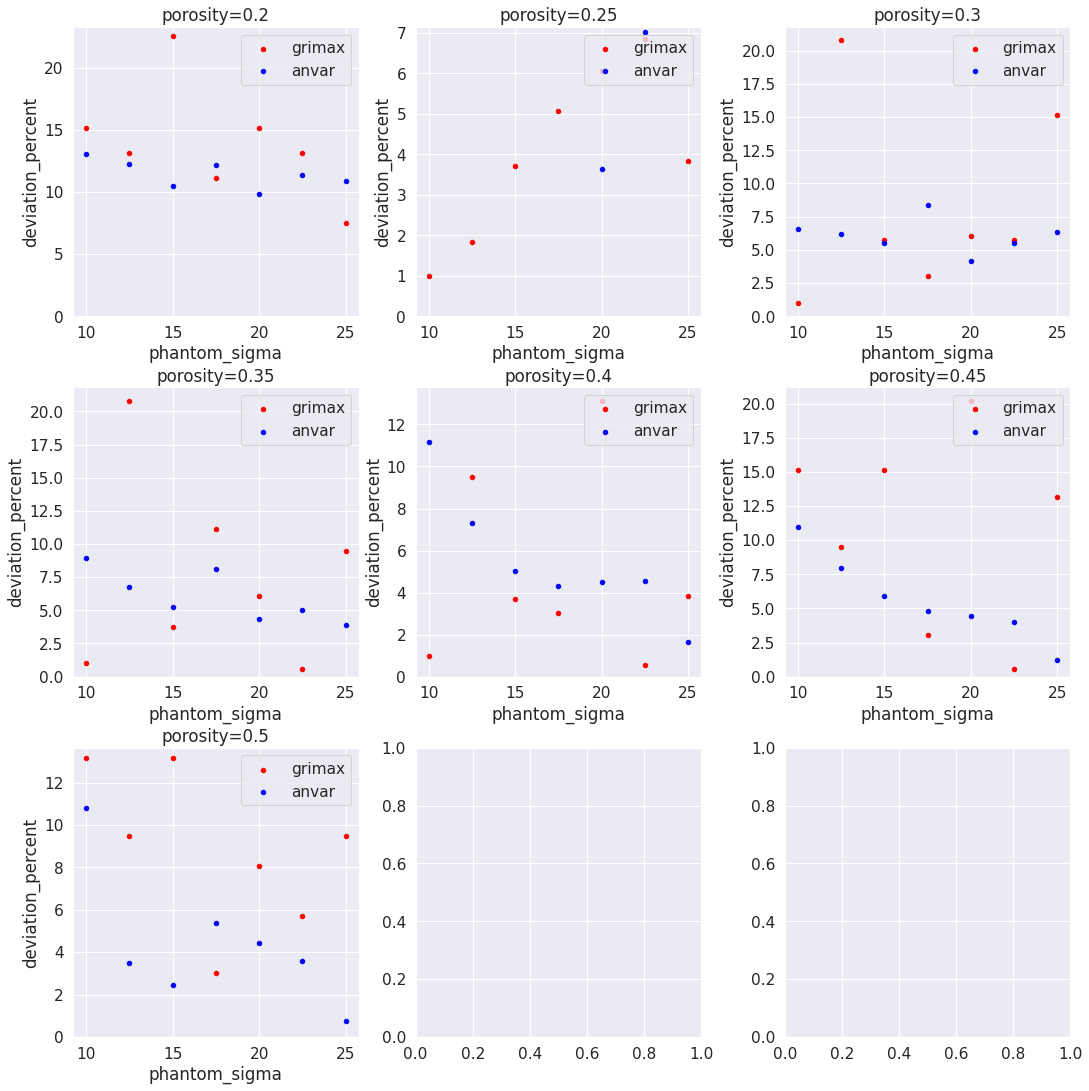

In [11]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        #polyfit
        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="deviation_percent",
                                                           ax=ax,
                                                           label=method,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(ymin=0)

    ax.legend(loc=1)


# 2D Samples

In [52]:
import sys
sys.path.append('..')

import phantom_generator as pg
import wavelet_sigma_extractor as wse
import random
import matplotlib.pyplot as plt
from skimage.morphology import binary_closing, binary_opening, ball, disk

from skimage.filters import threshold_otsu
from skimage.filters import rank

import h5py

norm_0_1 = lambda x: (x - x.min()) / (x.max() - x.min())

def filter_bin(img2d):
    selem = np.full([3,3] if img2d.ndim==2 else [3,3,3], 1)
    img2d_f = rank.mean(img2d, selem)

    img2d_f = img2d_f > threshold_otsu(img2d_f)
    
    selem_b = disk if img2d_f.ndim==2 else ball
    return binary_opening(binary_closing(img2d_f, selem_b(1)), selem_b(1))


In [104]:
def save_h5(img, file_name):
    hf = h5py.File(file_name+'.h5', 'w')
    hf.create_dataset('reconstruction', data=img)
    hf.close()

## sample 1

In [45]:
h5f = h5py.File('experimental_data/sample.h5','r')

img2d_poly = h5f['layer1'][:]
h5f.close()

In [96]:
def show_parallel_pair(img, label):
    img = norm_0_1(img)
    img_bin = filter_bin(img)

    fig, axes = plt.subplots(ncols=3, figsize=(15,5))
    img = img[0] if img.ndim == 3 else img
    img_filt = img_bin[0] if img_bin.ndim == 3 else img_bin

    porosity = 1 - img_filt.sum() / img_filt.size

    sigma = wse.get_sigma(img_filt, porosity)

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title(label + f" porosity ~ {porosity:.2f}")

    axes[1].imshow(img_filt, cmap="gray")
    axes[1].set_title(label + " bin")

    axes[2].imshow(pg.generate_phantom(img.shape, porosity, sigma), cmap="gray")
    axes[2].set_title(label + f" phantom, $\sigma$={sigma:.2f}")

    for ax in axes:
        ax.grid()

    plt.tight_layout()

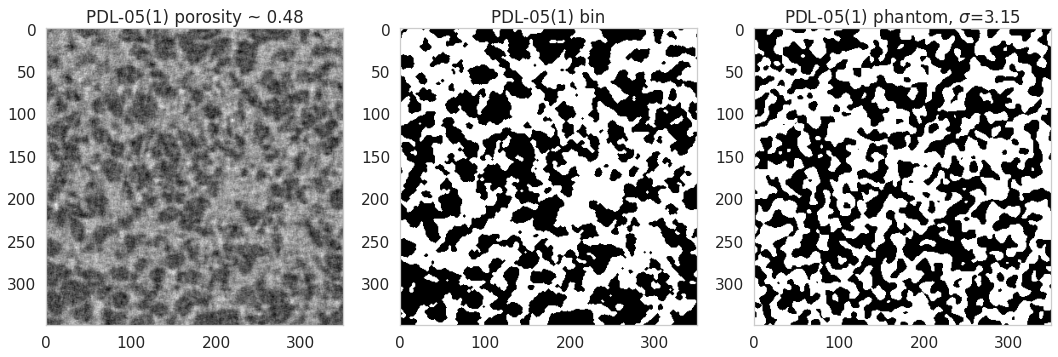

In [112]:
show_parallel_pair(img2d_poly, label="PDL-05(1)")

## sample 2

In [110]:
root_folder = '/home/krivonosov/reconstruction/'
folder_name = 'f320cb2c-e829-47b5-91f9-142d46410134'
sample_name = folder_name+'.h5'
img_path = root_folder+folder_name+'/'+sample_name
img3d = h5py.File(img_path,'r')['Reconstruction'][200:201]

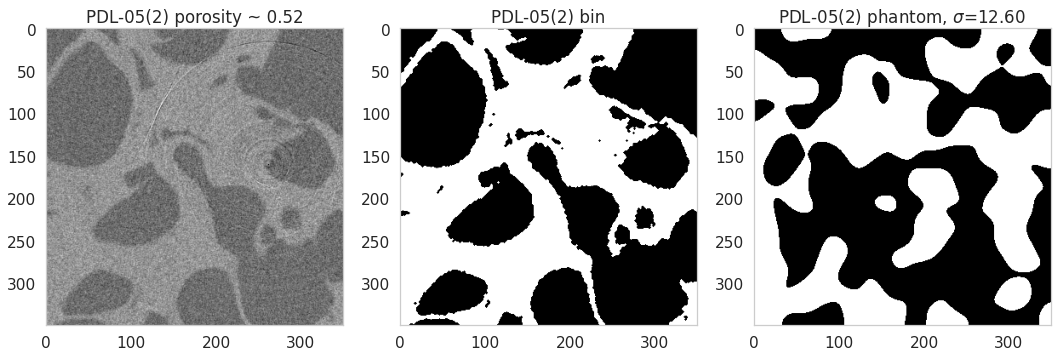

In [113]:
show_parallel_pair(img3d[0][200:550, 250:600], label="PDL-05(2)")

In [111]:
save_h5(img3d, "PDL05_2_2week_in_solvant")

# samlple 3

In [107]:
root_folder = '/diskmnt/b/makov/robotom/'
folder_name = '7c3ddfe1-c8e3-43c1-b9c0-9767b053372c'
sample_name = "tomo_rec.Uvarov-2020_N1_(sl1200_sdd15_Al-3.24mm)Mo_50_45"+'.h5'
img_path = root_folder+folder_name+'/'+sample_name
img3d = h5py.File(img_path,'r')['Reconstruction'][2000:2003, 950:1300, 850:1200]

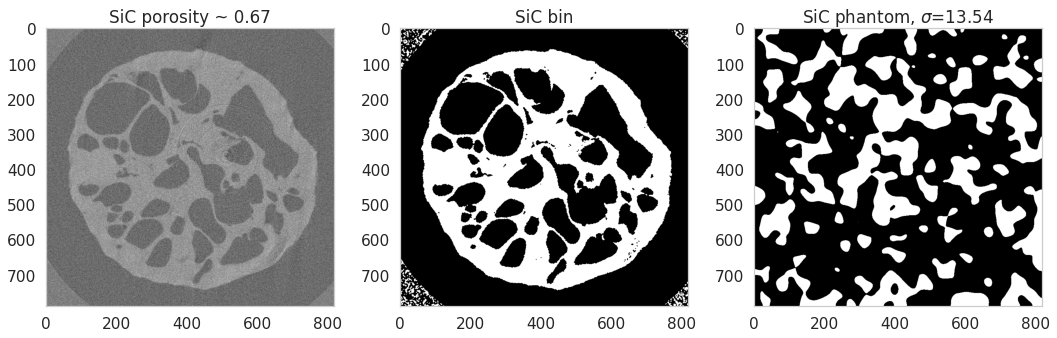

In [114]:
show_parallel_pair(img3d, label="SiC")

In [109]:
save_h5(img3d, "SiC")

# grimax trial

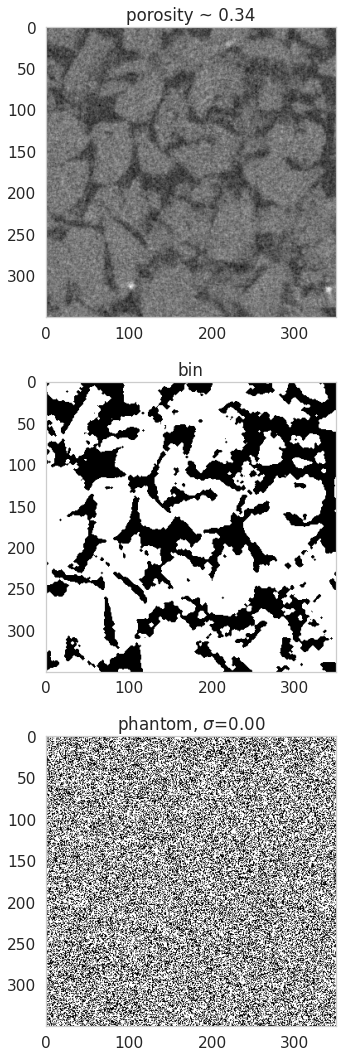

In [66]:
import grimax_sigma_extractor as grimax_se

def show_parallel_pair_grimax(img, img_bin):
    fig, axes = plt.subplots(nrows=3, figsize=(5,15))
    img = img[0] if img.ndim == 3 else img
    img_filt = img_bin[0] if img_bin.ndim == 3 else img_bin

    porosity = 1 - img_filt.sum() / img_filt.size

    sigma = grimax_se.get_sigma(img_filt, mode="smoothed")

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title(f"porosity ~ {porosity:.2f}")

    axes[1].imshow(img_filt, cmap="gray")
    axes[1].set_title(f"bin")

    axes[2].imshow(pg.generate_phantom(img.shape, porosity, sigma), cmap="gray")
    axes[2].set_title(f"phantom, $\sigma$={sigma:.2f}")

    for ax in axes:
        ax.grid()

    plt.tight_layout()

show_parallel_pair_grimax(img3d, img3d_bin)